In [1]:
%load_ext autoreload
%autoreload 2

### Imports

In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from usnm2p.logger import logger
from usnm2p.fileops import process_and_save, loadtif
from usnm2p.resamplers import StackResampler
from usnm2p.viewers import view_stack

### Functions

In [7]:
# def get_multichannel_stack(fname):
#     ''' Extract and separate channels from multi-channel TIF stack '''
#     # Load stack & metadata
#     stack, meta = loadtif(fname, metadata=True)
#     # Extract zoom factor
#     zoom_factor = meta['FrameData']['SI.hRoiManager.scanZoomFactor']
#     logger.info(f'zoom factor: {zoom_factor}')
#     # Return stack
#     return stack 
#     # # Split channels
#     # green, red = np.swapaxes(stack, 0, 1)
#     # # Return both channels 
#     # return green, red

### Grab file list

In [3]:
# Root directory for raw data
dataroot = '/Users/tlemaire/Desktop/bergamo_comp/data'
raw_stack_fpaths = sorted(glob.glob(os.path.join(dataroot, '*.tif')))
print(raw_stack_fpaths)

['/Users/tlemaire/Desktop/bergamo_comp/data/raw/justin6_region1_835frames_100Hz_200ms_30.00Hz_0.60MPa_50DC-run05_00008.tif', '/Users/tlemaire/Desktop/bergamo_comp/data/raw/justin7_region1_835frames_100Hz_200ms_30.00Hz_0.40MPa_50DC-run04_00007.tif']


### Resample stacks at target sampling rate 

 15/08/2022 16:45:46: "/Users/tlemaire/Desktop/bergamo_comp/data/resampled/sr_ref30.0_target3.56_smooth/justin6_region1_835frames_100Hz_200ms_30.00Hz_0.60MPa_50DC-run05_00008.tif" already exists
 15/08/2022 16:45:46: "/Users/tlemaire/Desktop/bergamo_comp/data/resampled/sr_ref30.0_target3.56_smooth/justin7_region1_835frames_100Hz_200ms_30.00Hz_0.40MPa_50DC-run04_00007.tif" already exists
 15/08/2022 16:45:49: loaded (835, 2, 512, 512) int16 stack from "/Users/tlemaire/Desktop/bergamo_comp/data/raw/justin6_region1_835frames_100Hz_200ms_30.00Hz_0.60MPa_50DC-run05_00008.tif"
 15/08/2022 16:45:49: loaded (100, 2, 512, 512) int16 stack from "/Users/tlemaire/Desktop/bergamo_comp/data/resampled/sr_ref30.0_target3.56_smooth/justin6_region1_835frames_100Hz_200ms_30.00Hz_0.60MPa_50DC-run05_00008.tif"
 15/08/2022 16:45:51: loaded (835, 2, 512, 512) int16 stack from "/Users/tlemaire/Desktop/bergamo_comp/data/raw/justin7_region1_835frames_100Hz_200ms_30.00Hz_0.40MPa_50DC-run04_00007.tif"
 15/08/2022

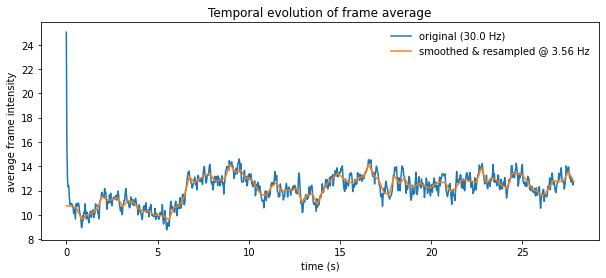

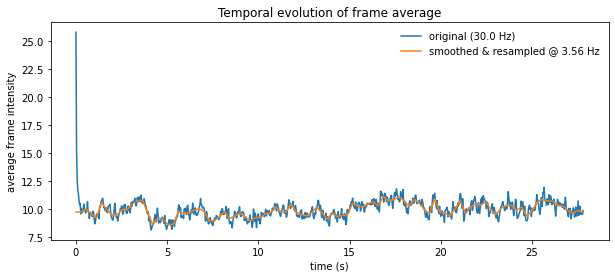

In [7]:
# Resample
ref_sr = 30.00  # Hz
target_sr = 3.56   # Hz
input_root = 'raw'
sr = StackResampler(ref_sr=ref_sr, target_sr=target_sr)
resampled_stack_fpaths = process_and_save(
    sr, raw_stack_fpaths, input_root, overwrite=False)

# Plot comparative time profiles of frame average
for raw_fpath, res_fpath in zip(raw_stack_fpaths, resampled_stack_fpaths):
    ref_stack, res_stack = loadtif(raw_fpath), loadtif(res_fpath)
    fig = sr.plot_comparative_frameavg(ref_stack, res_stack)

In [6]:
file = flist[4]
ref_fps = 30  # reference sampling rate (fps)
target_fps = 3.56  # target sampling rate (fps)

# Extract stack from TIF file
ref_stack = get_multichannel_stack(file)
logger.info(f'original stack shape: {ref_stack.shape}')

# Resample to target fps
res_stack = process_stack(ref_stack, ref_fps, target_fps, smooth=True)
logger.info(f'resampled stack shape: {res_stack.shape}')

 15/08/2022 13:57:26: loaded (835, 2, 512, 512) int16 stack from "/Users/tlemaire/Desktop/bergamo_comp/data/justin7_region1_835frames_100Hz_200ms_30.00Hz_0.40MPa_50DC-run04_00007.tif"
 15/08/2022 13:57:26: zoom factor: 1.5
 15/08/2022 13:57:26: original stack shape: (835, 2, 512, 512)
 15/08/2022 13:57:26: substituting erroneous first 10 frames of stack...
 15/08/2022 13:57:26: smoothing (835, 2, 512, 512) array with 8 samples moving average along axis 0
 15/08/2022 13:58:16: resampling (835, 2, 512, 512) stack from 30 Hz to 3.56 Hz... along axis 0
 15/08/2022 13:58:41: resampled stack shape: (100, 2, 512, 512)


In [116]:
# file = flist[3]
# green, red = get_multichannel_stack(file)
# fig = plot_frame(green.mean(axis=0))
# fig = plot_frame(red.mean(axis=0))
viewstack(res_stack2, title=file)

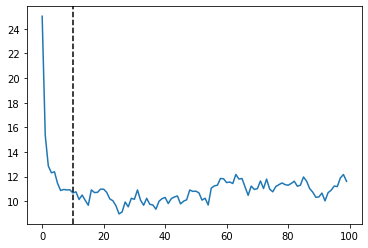

In [8]:
plt.figure()
frameavg = green.mean(axis=1).mean(axis=1)
tplt = np.arange(frameavg.size) / 30
n = 100
plt.plot(frameavg[:n])
plt.axvline(10, c='k', ls='--')
# plt.axvline(2.8, c='k', ls='--')
# plt.axvline(tplt[10], c='k', ls='--')

file: data/justin7_region1_835frames_100Hz_200ms_30.00Hz_0.40MPa_50DC-run04_00007.tif
zoom factor: 1.5


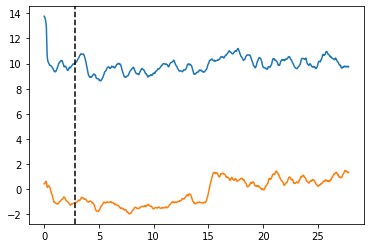

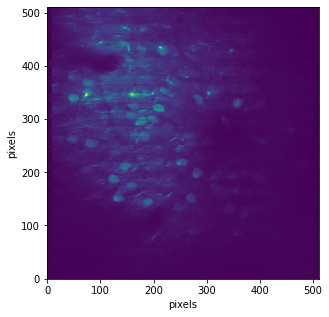

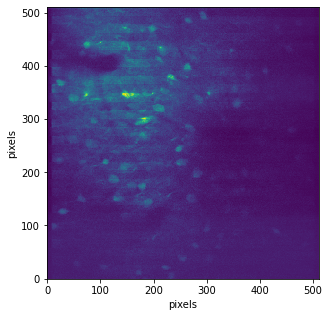

: 

In [94]:
file = flist[4]
green, red = get_stacks(file)
green_mean_series = np.array([x.mean() for x in green])
red_mean_series = np.array([x.mean() for x in red])
fig, ax = plt.subplots()
t = np.arange(red_mean_series.size) / 30
ax.plot(t, apply_rolling_window(green_mean_series, 15))
ax.plot(t, apply_rolling_window(red_mean_series, 15))
ax.axvline(2.8, ls='--', c='k')
# ax.set_ylim(7.5, 12.5)
fig = plot_frame(green.mean(axis=0))
fig = plot_frame(red.mean(axis=0))
viewstack(green, title=file)

file: data/SST8122_20200902_50DC_05MPa_00008.tif
zoom factor: 2


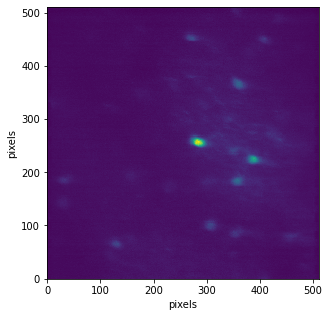

In [62]:
file = flist[2]
green_amy, red_amy = get_green_stack(file)
fig = plot_frame(green_amy.mean(axis=0))
# fig = plot_frame(red.max(axis=0))
viewstack(green_amy, title=file)

In [35]:
green, red = get_green_stack(flist[1])
viewstack(green)

file: test_fixed_filters_00001.tif
zoom factor: 1


/var/folders/86/b3z067_j0sbfgbhl7gx4p5640000gn/T/ipykernel_35342/3030106415.py:6: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(sm1)


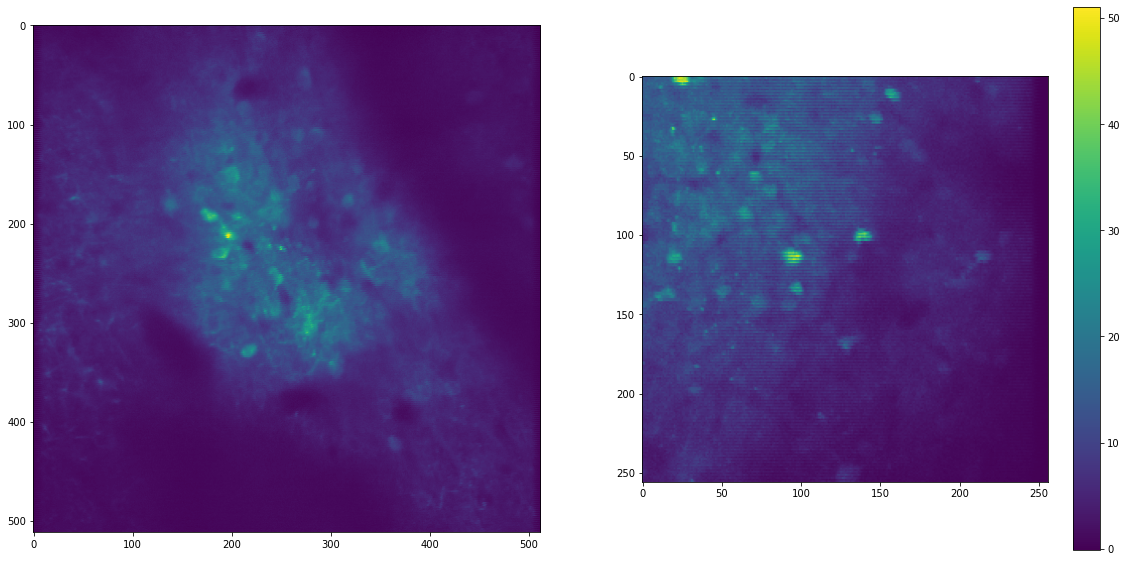

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sm1 = axes[0].imshow(green_amy.mean(axis=0))
green_max = green.mean(axis=0)
green2 = green_max[256:, 256:]
sm2 = axes[1].imshow(green2)
fig.colorbar(sm1)